In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

# Add parent directory to path for imports
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(__file__))))
from fields.potential_field_class import PotentialFieldDiscrete, PotentialField

In [2]:
# Create discretized potential field
pf_discrete = PotentialFieldDiscrete(
    x_bounds=(-5, 5),
    y_bounds=(-5, 5),
    resolution=200,
    scaling_factor=0.2
)

print(f"Grid shape: {pf_discrete.potential.shape}")
print(f"Grid spacing: dx={pf_discrete.dx:.4f}, dy={pf_discrete.dy:.4f}")

Grid shape: (200, 200)
Grid spacing: dx=0.0503, dy=0.0503


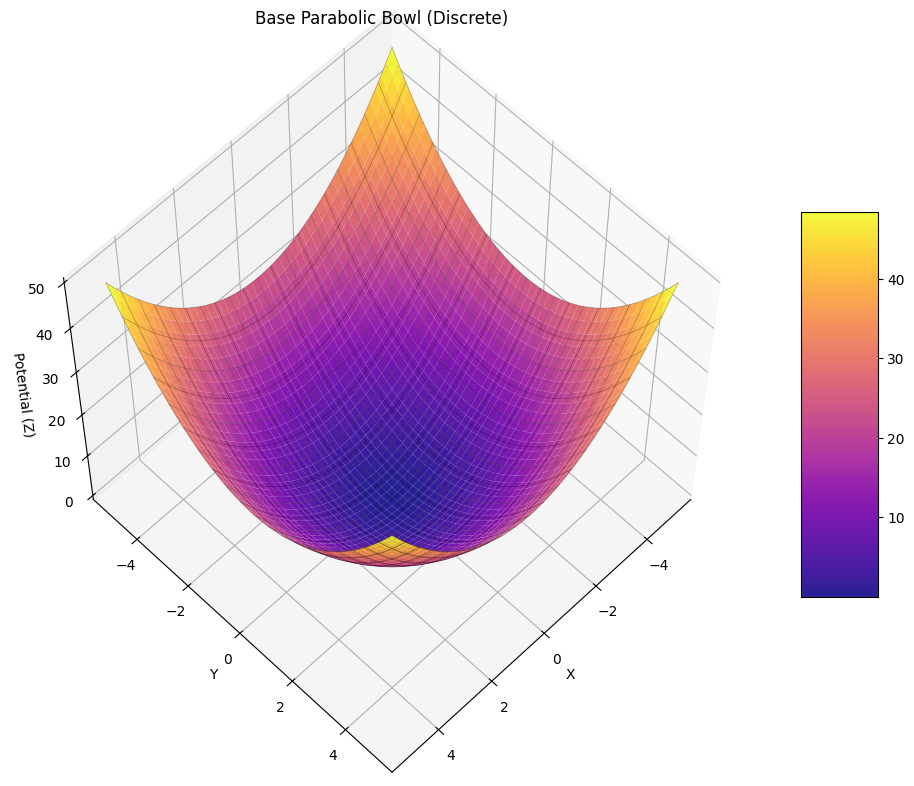

In [3]:
pf_discrete.visualize_3d(title="Base Parabolic Bowl (Discrete)")

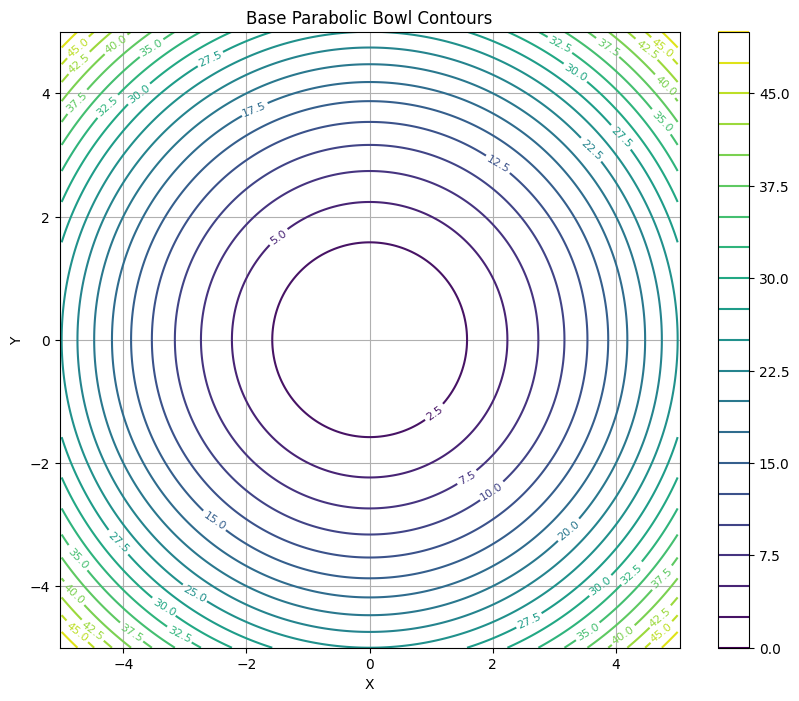

In [4]:
pf_discrete.visualize_contours(title="Base Parabolic Bowl Contours")

In [5]:
# Add some obstacles
pf_discrete.add_obstacle(2.0, 1.0, height=5.0, width=0.5)
pf_discrete.add_obstacle(-1.5, -2.0, height=8.0, width=0.3)
pf_discrete.add_obstacle(0.0, 3.0, height=6.0, width=0.4)

print(f"Number of obstacles: {len(pf_discrete.obstacles)}")

Number of obstacles: 3


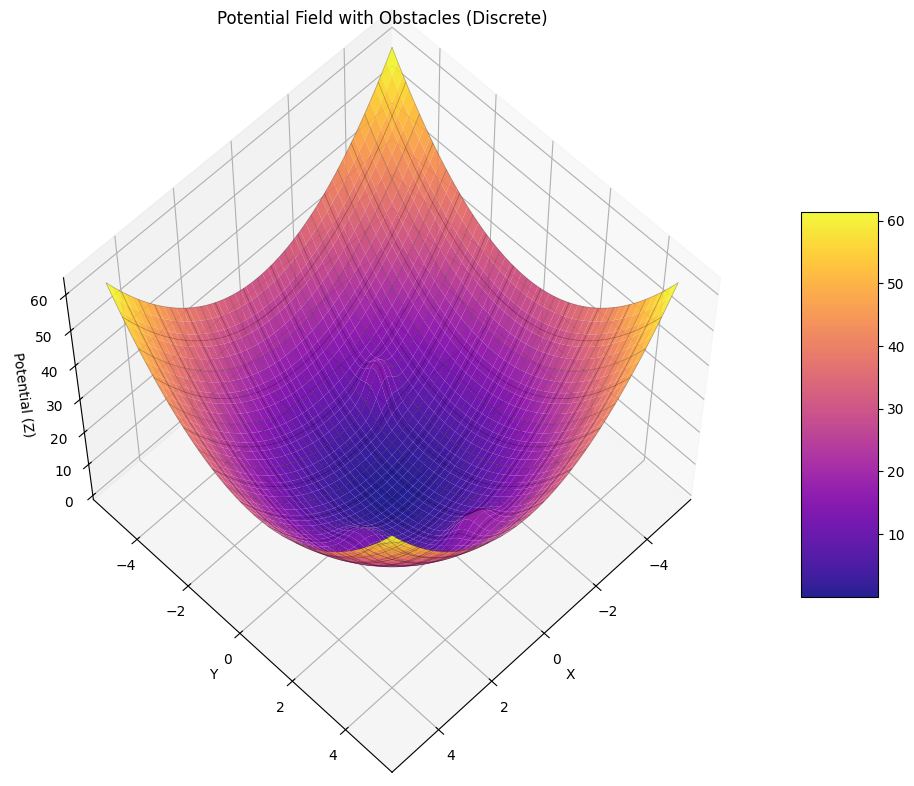

In [6]:
pf_discrete.visualize_3d(title="Potential Field with Obstacles (Discrete)")

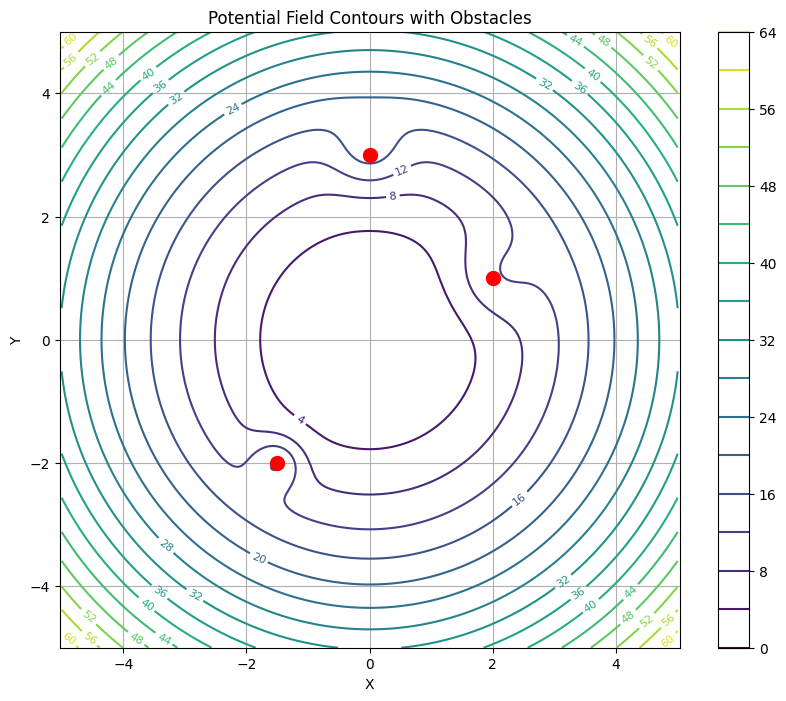

In [7]:
pf_discrete.visualize_contours(title="Potential Field Contours with Obstacles")

In [8]:
# Test gradient at various points
test_points = [(0, 0), (2, 1), (-1.5, -2), (3, 3)]

for x, y in test_points:
    gradient = pf_discrete.get_gradient(x, y)
    potential = pf_discrete.potential[
        np.argmin(np.abs(pf_discrete.y - y)),
        np.argmin(np.abs(pf_discrete.x - x))
    ]
    print(f"Point ({x:5.2f}, {y:5.2f}): Potential = {potential:6.3f}, Gradient = [{gradient[0]:7.3f}, {gradient[1]:7.3f}]")

Point ( 0.00,  0.00): Potential =  0.002, Gradient = [  0.002,   0.001]
Point ( 2.00,  1.00): Potential = 11.201, Gradient = [  5.066,   2.533]
Point (-1.50, -2.00): Potential = 15.750, Gradient = [ -3.798,  -5.064]
Point ( 3.00,  3.00): Potential = 22.648, Gradient = [  7.599,   7.598]


In [9]:
# Remove an obstacle
print(f"Before removal: {len(pf_discrete.obstacles)} obstacles")
pf_discrete.remove_obstacle(2.0, 1.0)
print(f"After removal: {len(pf_discrete.obstacles)} obstacles")

# Clear all obstacles
pf_discrete.clear_obstacles()
print(f"After clearing: {len(pf_discrete.obstacles)} obstacles")

Before removal: 3 obstacles
After removal: 2 obstacles
After clearing: 0 obstacles


In [10]:
# Create original PotentialField for comparison
pf_original = PotentialField(
    x_bounds=(-5, 5),
    y_bounds=(-5, 5),
    resolution=1000,
    scaling_factor=0.2
)

# Add same obstacles
pf_original.add_obstacle(2.0, 1.0, height=5.0, width=0.5)
pf_original.add_obstacle(-1.5, -2.0, height=8.0, width=0.3)
pf_original.add_obstacle(0.0, 3.0, height=6.0, width=0.4)

# Re-add obstacles to discrete version
pf_discrete.add_obstacle(2.0, 1.0, height=5.0, width=0.5)
pf_discrete.add_obstacle(-1.5, -2.0, height=8.0, width=0.3)
pf_discrete.add_obstacle(0.0, 3.0, height=6.0, width=0.4)

# Compare gradients at test points
test_points = [(0, 0), (1, 1), (-2, -1)]
print("Gradient comparison at test points:")
print(f"{'Point':<15} {'Discrete':<20} {'Original':<20} {'Difference':<12}")
print("-" * 70)

for x, y in test_points:
    grad_discrete = pf_discrete.get_gradient(x, y)
    grad_original = pf_original.get_gradient(x, y)
    diff = np.linalg.norm(grad_discrete - grad_original)
    print(f"({x:4.1f}, {y:4.1f})     [{grad_discrete[0]:7.3f}, {grad_discrete[1]:7.3f}]  [{grad_original[0]:7.3f}, {grad_original[1]:7.3f}]  {diff:7.4f}")

Gradient comparison at test points:
Point           Discrete             Original             Difference  
----------------------------------------------------------------------
( 0.0,  0.0)     [  0.002,   0.001]  [  0.002,   0.001]   0.0000
( 1.0,  1.0)     [  5.240,   2.533]  [  5.240,   2.533]   0.0000
(-2.0, -1.0)     [ -5.024,  -2.619]  [ -5.024,  -2.619]   0.0000


In [11]:
# Test with points that are clearly BETWEEN grid points
# Grid spacing is 0.01, so let's use points offset by 0.005 (halfway between grid points)
test_points_between = [
    (0.005, 0.005),   # Between grid points
    (1.005, 1.005),   # Between grid points  
    (-2.005, -1.005), # Between grid points
    (0.0, 0.0),       # Exactly on grid point (for comparison)
]

print("Testing bilinear interpolation effect:")
print(f"Grid spacing: {pf_discrete.dx:.4f}")
print(f"{'Point':<20} {'Discrete (interpolated)':<25} {'Original (exact)':<25} {'Difference':<12}")
print("-" * 85)

for x, y in test_points_between:
    grad_discrete = pf_discrete.get_gradient(x, y)
    grad_original = pf_original.get_gradient(x, y)
    diff = np.linalg.norm(grad_discrete - grad_original)
    
    # Check if point is on grid
    x_on_grid = np.any(np.abs(pf_discrete.x - x) < 1e-6)
    y_on_grid = np.any(np.abs(pf_discrete.y - y) < 1e-6)
    on_grid = "ON GRID" if (x_on_grid and y_on_grid) else "BETWEEN"
    
    print(f"({x:7.3f}, {y:7.3f}) {on_grid:8} [{grad_discrete[0]:7.3f}, {grad_discrete[1]:7.3f}]  [{grad_original[0]:7.3f}, {grad_original[1]:7.3f}]  {diff:7.4f}")

print("\nNote: The difference is primarily due to finite difference approximation")
print("vs symbolic differentiation, not interpolation method.")

Testing bilinear interpolation effect:
Grid spacing: 0.0503
Point                Discrete (interpolated)   Original (exact)          Difference  
-------------------------------------------------------------------------------------
(  0.005,   0.005) BETWEEN  [  0.015,   0.014]  [  0.015,   0.014]   0.0000
(  1.005,   1.005) BETWEEN  [  5.293,   2.532]  [  5.293,   2.532]   0.0000
( -2.005,  -1.005) BETWEEN  [ -5.035,  -2.634]  [ -5.035,  -2.634]   0.0000
(  0.000,   0.000) BETWEEN  [  0.002,   0.001]  [  0.002,   0.001]   0.0000

Note: The difference is primarily due to finite difference approximation
vs symbolic differentiation, not interpolation method.
